In [1]:
#!pip uninstall protobuf 

#!pip install protobuf==3.19.4
#! pip install tensorflow --upgrade --user


In [2]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split
from ast import literal_eval

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('total.csv')

In [4]:
data = data.drop(columns=['clase_pri', 'clase_otr','clases'])

In [5]:
data

,titulo,abstract,categorias
0,An Actor-Critic Algorithm for Sequence Prediction,We present an approach to training neural ne...,['cs.LG']
1,Playing Flappy Bird via Asynchronous Advantage...,"Flappy Bird, which has a very high popularit...","['cs.LG', 'cs.NE']"
2,Distributional Advantage Actor-Critic,"In traditional reinforcement learning, an ag...","['cs.LG', 'cs.AI', 'stat.ML']"
3,Off-Policy Actor-Critic,This paper presents the first actor-critic a...,['cs.LG']
4,Asymmetric Actor Critic for Image-Based Robot ...,Deep reinforcement learning (RL) has proven ...,"['cs.RO', 'cs.AI', 'cs.LG']"
...,...,...,...
36859,A Ray-based Approach for Boundary Estimation o...,Diffusion Tensor Imaging (DTI) is a non-invasi...,['cs.CV']
36860,Statistical Denoising for single molecule fluo...,Single molecule fluorescence microscopy is a p...,['cs.CV']
36861,Blinking Molecule Tracking,We discuss a method for tracking individual mo...,"['cs.CV', 'cs.DM']"
36862,Towards a Mathematical Foundation of Immunolog...,We attempt to set a mathematical foundation of...,"['stat.ML', 'cs.LG', 'q-bio.GN']"


In [6]:
data["categorias"] = data["categorias"].apply(
    lambda x: literal_eval(x)
)
data["categorias"].values[:5]

array([list(['cs.LG']), list(['cs.LG', 'cs.NE']),
       list(['cs.LG', 'cs.AI', 'stat.ML']), list(['cs.LG']),
       list(['cs.RO', 'cs.AI', 'cs.LG'])], dtype=object)

In [7]:
test_split = 0.1

# Initial train and test split.
train_df, test_df = train_test_split(
    data,
    test_size=test_split,
    stratify=data["categorias"].values,
)
# Splitting the test set further into validation
# and new test sets.
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

In [8]:
terms = tf.ragged.constant(train_df["categorias"].values)
lookup = tf.keras.layers.StringLookup(output_mode="multi_hot")
lookup.adapt(terms)
vocab = lookup.get_vocabulary()


def invert_multi_hot(encoded_labels):
    """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(vocab, hot_indices)


print("Vocabulary:\n")
print(vocab)

Vocabulary:

['[UNK]', 'cs.CV', 'cs.LG', 'stat.ML', 'cs.AI', 'eess.IV', 'cs.RO', 'cs.CL', 'cs.NE', 'cs.CR', 'math.OC', 'eess.SP', 'cs.GR', 'cs.SI', 'cs.MM', 'cs.SY', 'cs.IR', 'cs.MA', 'eess.SY', 'cs.HC', 'cs.CY', 'math.IT', 'cs.IT', 'cs.DC', 'stat.AP', 'stat.TH', 'math.ST', 'stat.ME', 'eess.AS', 'cs.SD', 'q-bio.QM', 'q-bio.NC', 'cs.DS', 'cs.NI', 'cs.GT', 'cs.SE', 'cs.CG', 'I.2.6', 'stat.CO', 'math.NA', 'cs.NA', 'cs.DB', 'physics.chem-ph', 'quant-ph', 'q-bio.BM', 'cs.PL', 'cs.LO', 'cond-mat.dis-nn', '68T45', 'math.PR', 'physics.comp-ph', 'cs.AR', 'cs.CE', 'I.2.10', 'q-fin.ST', 'cond-mat.stat-mech', 'math.DS', 'cs.CC', '68T05', 'physics.data-an', 'I.4.6', 'physics.soc-ph', 'astro-ph.IM', 'physics.ao-ph', 'econ.EM', 'cs.DM', 'q-bio.GN', 'physics.med-ph', 'math.AT', 'cs.PF', 'I.4.8', 'cond-mat.str-el', 'cond-mat.mes-hall', 'I.4', 'q-fin.TR', 'cs.FL', 'cond-mat.mtrl-sci', 'I.5.4', 'I.2', '68U10', 'physics.geo-ph', 'hep-ex', '68T10', 'q-fin.GN', 'physics.optics', 'physics.flu-dyn', 'math.AP'

In [9]:
sample_label = train_df["categorias"].iloc[0]
print(f"Original label: {sample_label}")

label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")

Original label: ['cs.CV']
Label-binarized representation: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [10]:
train_df["abstract"].apply(lambda x: len(x.split(" "))).describe()

count    33177.000000
mean       156.435452
std         41.631554
min          5.000000
25%        128.000000
50%        154.000000
75%        183.000000
max        462.000000
Name: abstract, dtype: float64

In [11]:
max_seqlen = 155
batch_size = 128
padding_token = "<pad>"
auto = tf.data.AUTOTUNE


def make_dataset(dataframe, is_train=True):
    labels = tf.ragged.constant(dataframe["categorias"].values)
    label_binarized = lookup(labels).numpy()
    dataset = tf.data.Dataset.from_tensor_slices(
        (dataframe["abstract"].values, label_binarized)
    )
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    return dataset.batch(batch_size)

In [12]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

In [13]:
text_batch, label_batch = next(iter(train_dataset))

for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    print(" ")

Abstract: b'We present a learning-based method for 6 DoF pose estimation of rigid objects\nin point cloud data. Many recent learning-based approaches use primarily RGB\ninformation for detecting objects, in some cases with an added refinement step\nusing depth data. Our method consumes unordered point sets with/without RGB\ninformation, from initial detection to the final transformation estimation\nstage. This allows us to achieve accurate pose estimates, in some cases\nsurpassing state of the art methods trained on the same data.'
Label(s): ['cs.CV']
 
Abstract: b'Predictive business process monitoring focuses on predicting future\ncharacteristics of a running process using event logs. The foresight into\nprocess execution promises great potentials for efficient operations, better\nresource management, and effective customer services. Deep learning-based\napproaches have been widely adopted in process mining to address the\nlimitations of classical algorithms for solving multiple prob

In [14]:
# Source: https://stackoverflow.com/a/18937309/7636462
vocabulary = set()
train_df["abstract"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

153948


In [15]:
text_vectorizer = layers.TextVectorization(
    max_tokens=vocabulary_size, ngrams=2, output_mode="tf_idf"
)

# `TextVectorization` layer needs to be adapted as per the vocabulary from our
# training set.
with tf.device("/CPU:0"):
    text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

train_dataset = train_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
validation_dataset = validation_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
test_dataset = test_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [16]:
def make_model():
    shallow_mlp_model = keras.Sequential(
        [
            layers.Dense(512, activation="relu"),
            layers.Dense(256, activation="relu"),
            layers.Dense(lookup.vocabulary_size(), activation="sigmoid"),
        ]  # More on why "sigmoid" has been used here in a moment.
    )
    return shallow_mlp_model

Epoch 1/20
260/260 [==============================] - 175s 667ms/step - loss: 0.0311 - binary_accuracy: 0.9897 - val_loss: 0.0178 - val_binary_accuracy: 0.9945
Epoch 2/20
260/260 [==============================] - 184s 707ms/step - loss: 0.0031 - binary_accuracy: 0.9991 - val_loss: 0.0255 - val_binary_accuracy: 0.9941
Epoch 3/20
260/260 [==============================] - 179s 686ms/step - loss: 8.1132e-04 - binary_accuracy: 0.9998 - val_loss: 0.0307 - val_binary_accuracy: 0.9940
Epoch 4/20
260/260 [==============================] - 185s 709ms/step - loss: 3.3187e-04 - binary_accuracy: 1.0000 - val_loss: 0.0356 - val_binary_accuracy: 0.9942
Epoch 5/20
260/260 [==============================] - 198s 760ms/step - loss: 2.0053e-04 - binary_accuracy: 1.0000 - val_loss: 0.0376 - val_binary_accuracy: 0.9940
Epoch 6/20
260/260 [==============================] - 190s 727ms/step - loss: 1.2671e-04 - binary_accuracy: 1.0000 - val_loss: 0.0388 - val_binary_accuracy: 0.9942
Epoch 7/20
260/260 [====

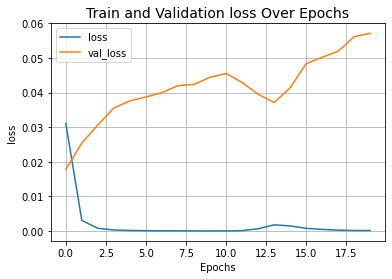

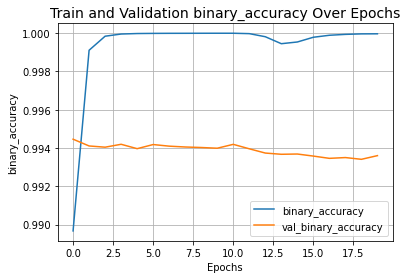

In [17]:
epochs = 20

shallow_mlp_model = make_model()
shallow_mlp_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["binary_accuracy"]
)

history = shallow_mlp_model.fit(
    train_dataset, validation_data=validation_dataset, epochs=epochs
)


def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("binary_accuracy")

In [19]:
keras.models.save_model(shallow_mlp_model,'radEd_model_v1.hdf5')

In [18]:
_, binary_acc = shallow_mlp_model.evaluate(test_dataset)
print(f"Categorical accuracy on the test set: {round(binary_acc * 100, 2)}%.")

15/15 [==============================] - 5s 320ms/step - loss: 0.0609 - binary_accuracy: 0.9935
Categorical accuracy on the test set: 99.35%.
